In [1]:
#
import pandas
from datetime import datetime
#below we imported py timezone UTC to run datetime function to
from pytz import UTC
import matplotlib.pyplot as plt
#below we added parse_date function to read the 'timestamp' as datetimes and not str
data = pandas.read_csv("reviews.csv", parse_dates = ['Timestamp'])



In [3]:
#using the pandas groupby()method to plot and aggregate the Rating data
#groupby() works by trying to find identical values
#we added a new column 'Day' in the dataframe
#.dt is a property that gives us a number of data time attributes such as date, month etc
data['Day'] = data['Timestamp'].dt.date 
day_average = data.groupby(['Day']).mean() #we changed 'Timestamp' to 'Day ' to get mean agregate 'Rating' for the 'Day'
day_average.index                             #'Day is not actually a column, its an index', .index lets you access 'Day'
#day_average['Rating']                        #rather than day_average['Day']
#type(day_average['Rating'])
#list(day_average.index)

Index([2018-01-01, 2018-01-02, 2018-01-03, 2018-01-04, 2018-01-05, 2018-01-06,
       2018-01-07, 2018-01-08, 2018-01-09, 2018-01-10,
       ...
       2021-03-24, 2021-03-25, 2021-03-26, 2021-03-27, 2021-03-28, 2021-03-29,
       2021-03-30, 2021-03-31, 2021-04-01, 2021-04-02],
      dtype='object', name='Day', length=1188)

# Plotting using Matplotlib

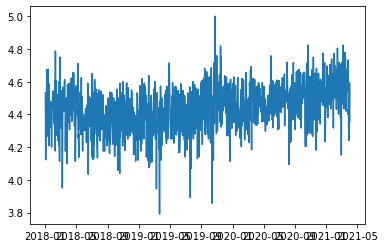

In [8]:
#NOTE---.mean() only works with numbers, so when printing out columns and rows with strings, they disappear
data['Day'] = data['Timestamp'].dt.date 
day_average = data.groupby(['Day']).mean() 
plt.plot(day_average.index, day_average['Rating'])               

In [7]:
#NOTE---.mean() only works with numbers, so when printing out columns and rows with strings, they disappear
day_average['Rating'].min()
day_average['Rating'].mean()
day_average['Rating'].max()

5.0

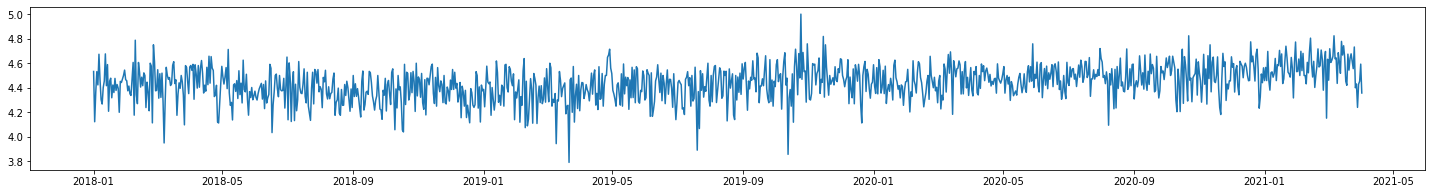

In [6]:
data['Day'] = data['Timestamp'].dt.date 
day_average = data.groupby(['Day']).mean() 
plt.figure(figsize = (25,3))   #figsize object with arguments spreads out the graph, not very readable
plt.plot(day_average.index, day_average['Rating'])               

# Rating average/count by day

In [13]:
#NOTE---.mean() only works with numbers, so when printing out columns and rows with strings, they disappear, works with .count()
data['Day'] = data['Timestamp'].dt.date 
day_average = data.groupby(['Day']).count()
#day_average = data.groupby(['Day']).mean()
day_average

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15
...,...,...,...,...
2021-03-29,25,25,25,1
2021-03-30,35,35,35,1
2021-03-31,32,32,32,3


# Down sampling and plotting average ratings  by week

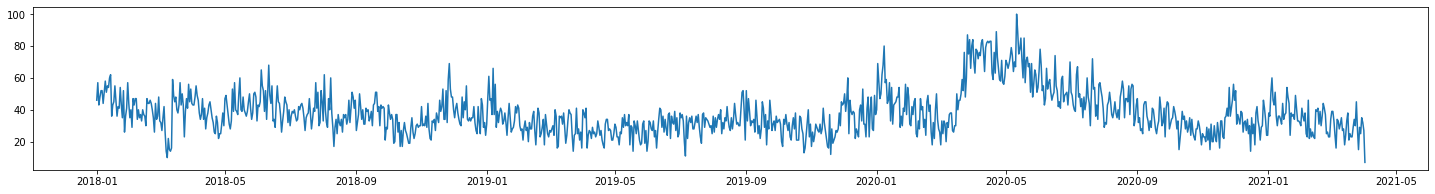

In [12]:
plt.figure(figsize = (25,3)) 
plt.plot(day_average.index, day_average['Rating'])

# Rating average by week

In [19]:
data['Week'] = data['Timestamp'].dt.strftime('%Y -%U') #.strftime means string from time, %Y -%U mean extracting year and week
#data['Week'].max()                                    #python datetime codes..
data['Week']

0        2021 -13
1        2021 -13
2        2021 -13
3        2021 -13
4        2021 -13
           ...   
44995    2018 -00
44996    2018 -00
44997    2018 -00
44998    2018 -00
44999    2018 -00
Name: Week, Length: 45000, dtype: object

In [26]:
data['Week'] = data['Timestamp'].dt.strftime('%Y -%U')
week_average = data.groupby(['Week']).mean()
week_average
week_average['Rating']

Week
2018 -00    4.434564
2018 -01    4.424933
2018 -02    4.417702
2018 -03    4.401024
2018 -04    4.468085
              ...   
2021 -09    4.560096
2021 -10    4.627315
2021 -11    4.629121
2021 -12    4.607843
2021 -13    4.429032
Name: Rating, Length: 173, dtype: float64

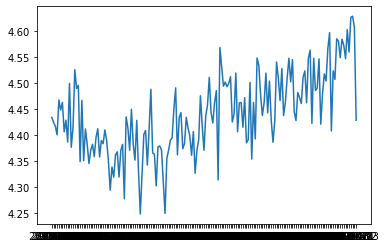

In [2]:
#plot by matplotlib
data['Week'] = data['Timestamp'].dt.strftime('%Y -%U')
week_average = data.groupby(['Week']).mean()
week_average['Rating']
plt.plot(week_average.index, week_average['Rating'])


# Rating average by month

In [39]:
data['Month'] = data['Timestamp'].dt.strftime('%Y -%U')
month_average = data.groupby(data['Month']).mean()
month_average

,Rating
Month,
2018 -00,4.434564
2018 -01,4.424933
2018 -02,4.417702
2018 -03,4.401024
2018 -04,4.468085
...,...
2021 -09,4.560096
2021 -10,4.627315
2021 -11,4.629121


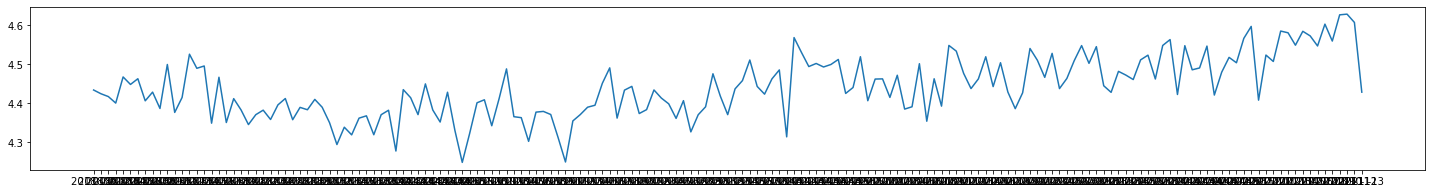

In [59]:
data['Month'] = data['Timestamp'].dt.strftime('%Y, -%m') #we changed the week (%U) to month code (-%m)
month_averge = data.groupby('Month').mean()
plt.figure(figsize = (25,3))
plt.plot(month_average.index, month_average['Rating'])

# Average rating month by course

<AxesSubplot:xlabel='Month'>

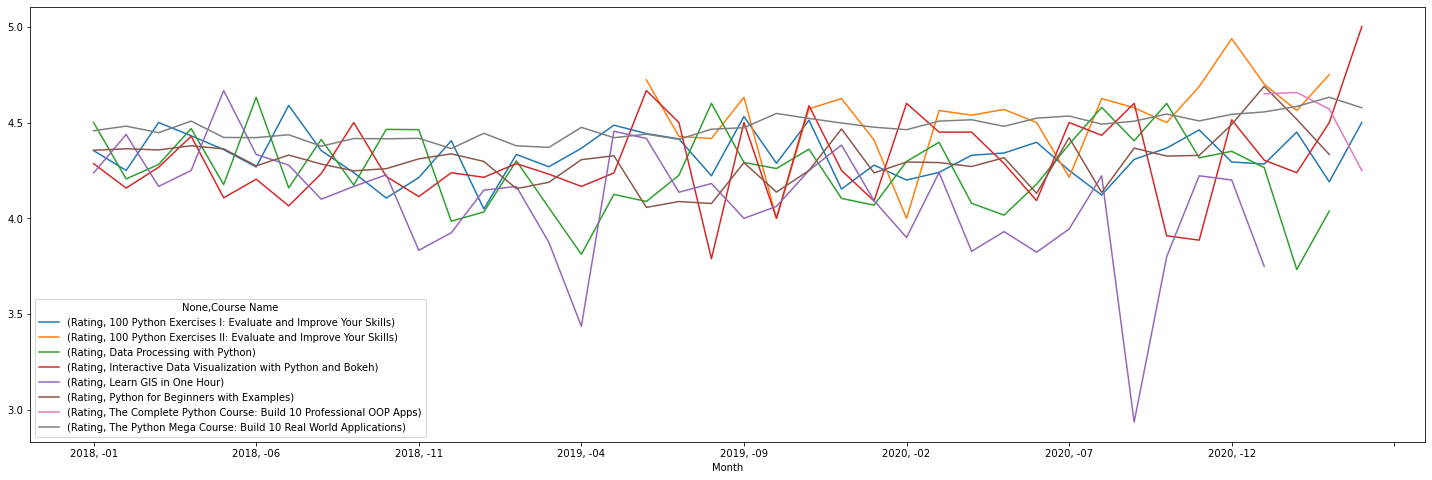

In [12]:
data['Month'] = data['Timestamp'].dt.strftime('%Y, -%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack() #unstacks the data frame for better structure
#month_average_crs[:20]
month_average_crs.plot(figsize =(25,8))

<AxesSubplot:xlabel='Month'>

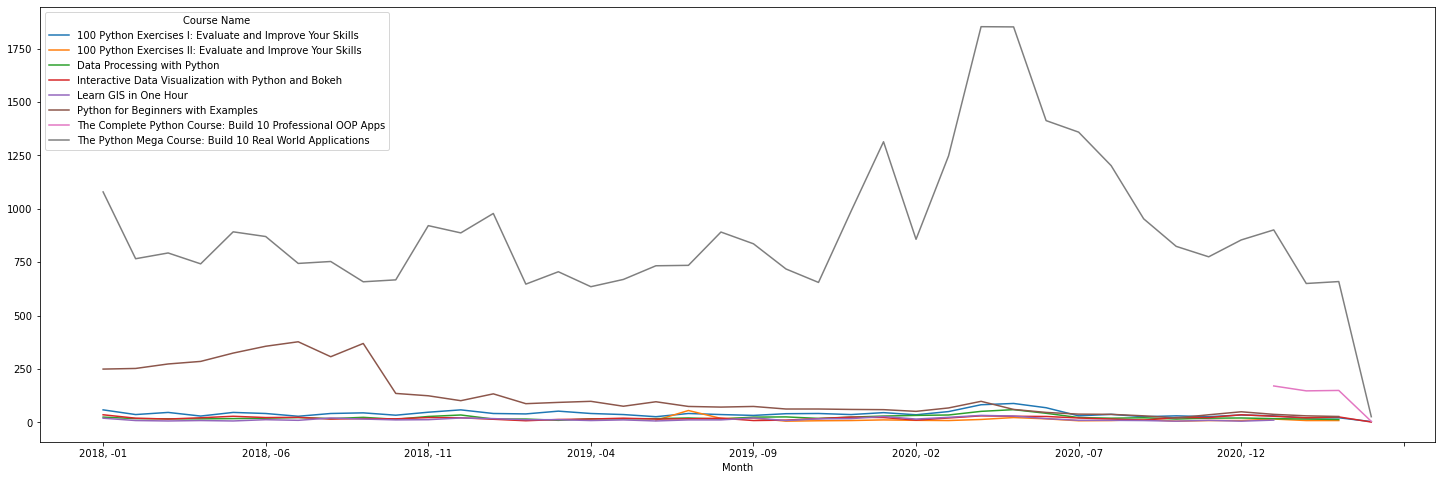

In [14]:
#extract rating
data['Month'] = data['Timestamp'].dt.strftime('%Y, -%m')
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()#here we extracted ['Rating']
#month_average_crs[:20]
month_average_crs.plot(figsize =(25,8))

In [ ]:
data['Month'] = data['Timestamp'].dt.strftime('%Y, -%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack() #unstacks the data frame for better structure
#month_average_crs[:20]
month_average_crs.plot(figsize =(25,8))

In [56]:
month_average.head()

,Rating
Month,
2018 -00,4.434564
2018 -01,4.424933
2018 -02,4.417702
2018 -03,4.401024
2018 -04,4.468085


# What day are people the happiest?

In [3]:
data


,Course Name,Timestamp,Rating,Comment,Week
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021 -13
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021 -13
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021 -13
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021 -13
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021 -13
...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018 -00
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018 -00
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018 -00
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018 -00


In [7]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')# %A =day of the week code
data


,Course Name,Timestamp,Rating,Comment,Week,Weekday
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021 -13,Friday
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021 -13,Friday
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021 -13,Friday
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021 -13,Friday
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021 -13,Friday
...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018 -00,Monday
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018 -00,Monday
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018 -00,Monday
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018 -00,Monday


In [8]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')# %A =day of the week code
weekday_average = data.groupby(["Weekday"]).mean()
weekday_average

,Rating
Weekday,
Friday,4.455207
Monday,4.449335
Saturday,4.440274
Sunday,4.439097
Thursday,4.437880
Tuesday,4.446240
Wednesday,4.427452


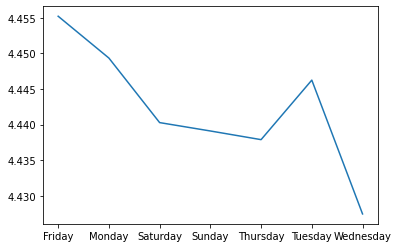

In [17]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')# %A =day of the week code
weekday_average = data.groupby(["Weekday"]).mean()
plt.plot(weekday_average.index, weekday_average['Rating'])

In [21]:
#sorting the data for week day. the results are not what we really want
data['Weekday'] = data['Timestamp'].dt.strftime('%A')# %A =day of the week code
weekday_average = data.groupby(["Weekday"]).mean()
weekday_average = weekday_average.sort_values('Weekday')
weekday_average
#plt.plot(weekday_average.index, weekday_average['Rating'])

,Rating
Weekday,
Friday,4.455207
Monday,4.449335
Saturday,4.440274
Sunday,4.439097
Thursday,4.437880
Tuesday,4.446240
Wednesday,4.427452


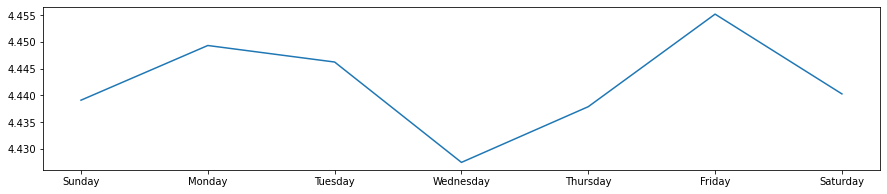

In [35]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')# %A =day of the week code
data['Day Number'] = data["Timestamp"].dt.strftime('%w')#this gives an int to the day of the week
weekday_average = data.groupby(['Weekday','Day Number']).mean() #we are grouping both weekday and he day number 
weekday_average = weekday_average.sort_values('Day Number')
#this creates a double index, causes an error
#we need to extract one column by using the get_leve_values()function..the 0 index is the weekday column we extract
weekday_average.index.get_level_values(0)
plt.figure(figsize = [15, 3])
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])

# Other types of charts

In [38]:
#find help with dir(plt) and then help with help(plt.pie) to find out details about the pie chart 
help(plt.pie)


Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : li

# Number of rating by course

([<matplotlib.patches.Wedge at 0x2a087c98670>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

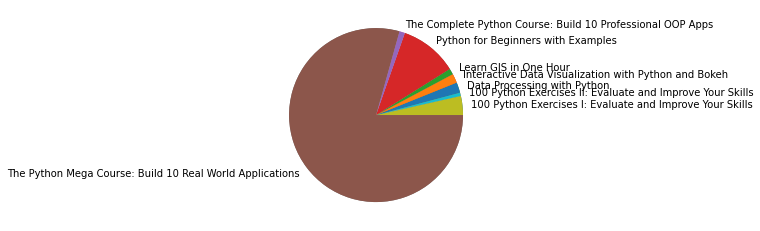

In [47]:
##make use of a pie chart for our give data frame
share = data.groupby(['Course Name'])['Rating'].count() #extracts the rating column
plt.pie(share)
plt.pie(share, labels = share.index)#adding 'labels = share.index' adds the labels to the pie chart